In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
file_path = r'D:\New Folder\proje 3\bankruptcy-prevention (1).csv'
df = pd.read_csv(file_path,sep=';')

In [2]:
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [4]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [5]:
df.dtypes

industrial_risk           float64
 management_risk          float64
 financial_flexibility    float64
 credibility              float64
 competitiveness          float64
 operating_risk           float64
 class                     object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [7]:
print(df.describe())

       industrial_risk   management_risk   financial_flexibility  \
count       250.000000        250.000000              250.000000   
mean          0.518000          0.614000                0.376000   
std           0.411526          0.410705                0.401583   
min           0.000000          0.000000                0.000000   
25%           0.000000          0.500000                0.000000   
50%           0.500000          0.500000                0.500000   
75%           1.000000          1.000000                0.500000   
max           1.000000          1.000000                1.000000   

        credibility   competitiveness   operating_risk  
count    250.000000        250.000000       250.000000  
mean       0.470000          0.476000         0.570000  
std        0.415682          0.440682         0.434575  
min        0.000000          0.000000         0.000000  
25%        0.000000          0.000000         0.000000  
50%        0.500000          0.500000        

In [8]:
df.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [4]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
245     True
246     True
247     True
248     True
249     True
Length: 250, dtype: bool

In [3]:
df[df.duplicated()].shape

(147, 7)

In [40]:
df.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [5]:
df.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000


In [6]:
# Count of bankruptcy and non-bankruptcy case
df[' class'].value_counts()

non-bankruptcy    143
bankruptcy        107
Name:  class, dtype: int64

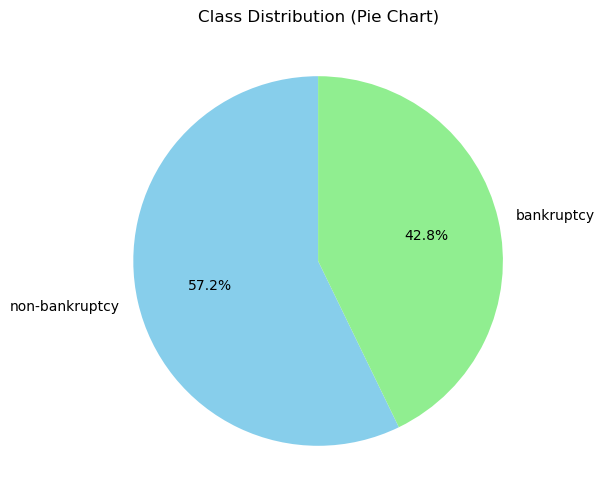

In [7]:
# Pie chart for class distribution
class_counts = df[' class'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Class Distribution (Pie Chart)')
plt.show()

<AxesSubplot:xlabel='industrial_risk'>

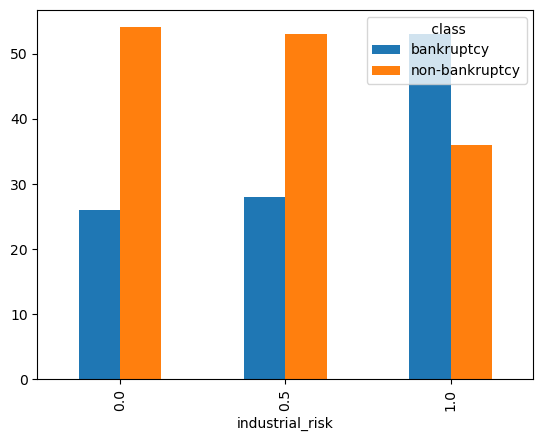

In [8]:
pd.crosstab(df['industrial_risk'], df[' class']).plot(kind = 'bar')

<AxesSubplot:xlabel=' management_risk'>

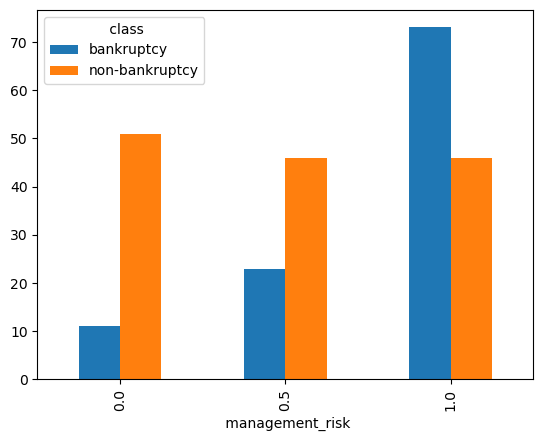

In [9]:
pd.crosstab(df[' management_risk'], df[' class']).plot(kind = 'bar')

<AxesSubplot:xlabel=' financial_flexibility'>

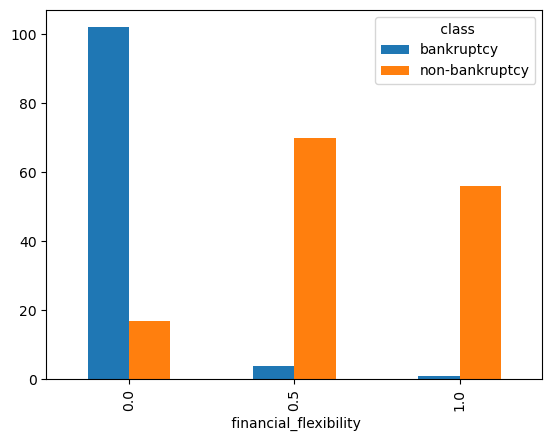

In [10]:
pd.crosstab(df[' financial_flexibility'], df[' class']).plot(kind = 'bar')

<AxesSubplot:xlabel=' credibility'>

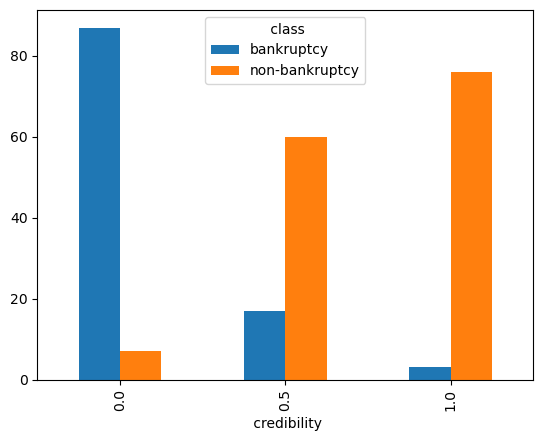

In [11]:
pd.crosstab(df[' credibility'], df[' class']).plot(kind = 'bar')

<AxesSubplot:xlabel=' competitiveness'>

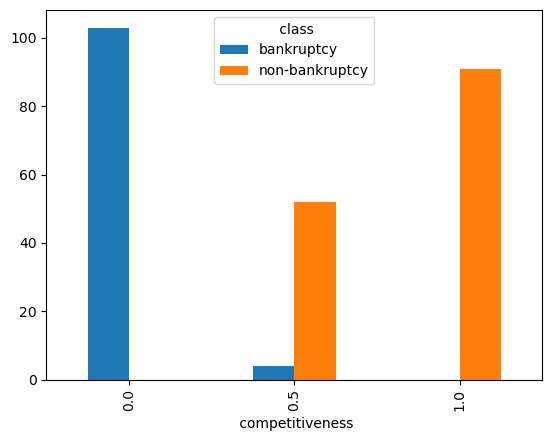

In [12]:
pd.crosstab(df[' competitiveness'], df[' class']).plot(kind = 'bar')

<AxesSubplot:xlabel=' operating_risk'>

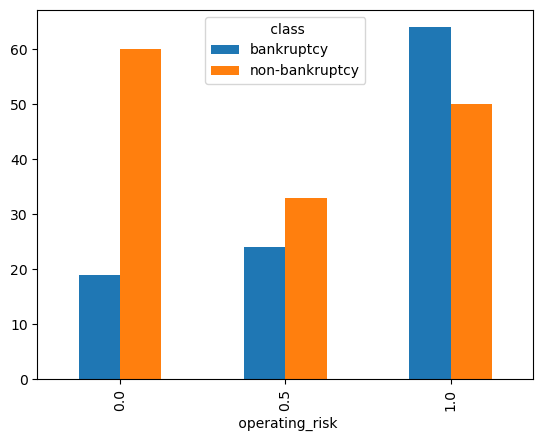

In [13]:
pd.crosstab(df[' operating_risk'], df[' class']).plot(kind = 'bar')

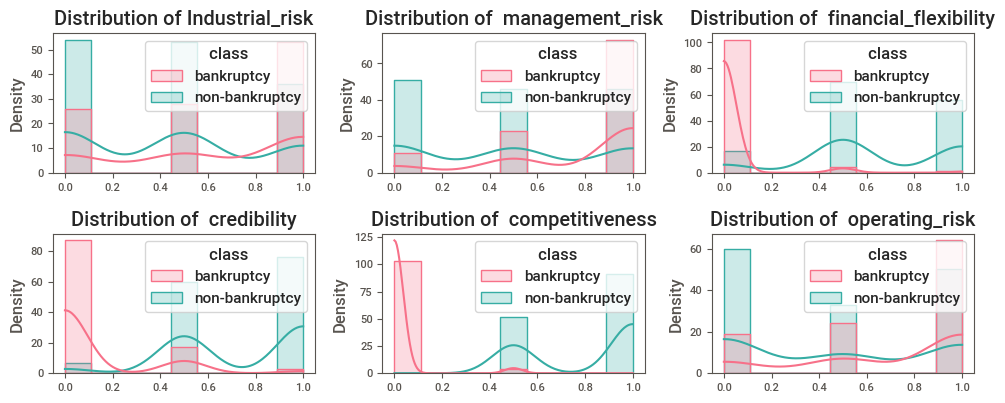

In [61]:
# Histogram for all features
plt.figure(figsize=(10, 6))

for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)  # 3x3 grid for 7 features
    sns.histplot(data=df, x=column, hue=' class', kde=True, palette='husl', element='step', common_norm=False)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

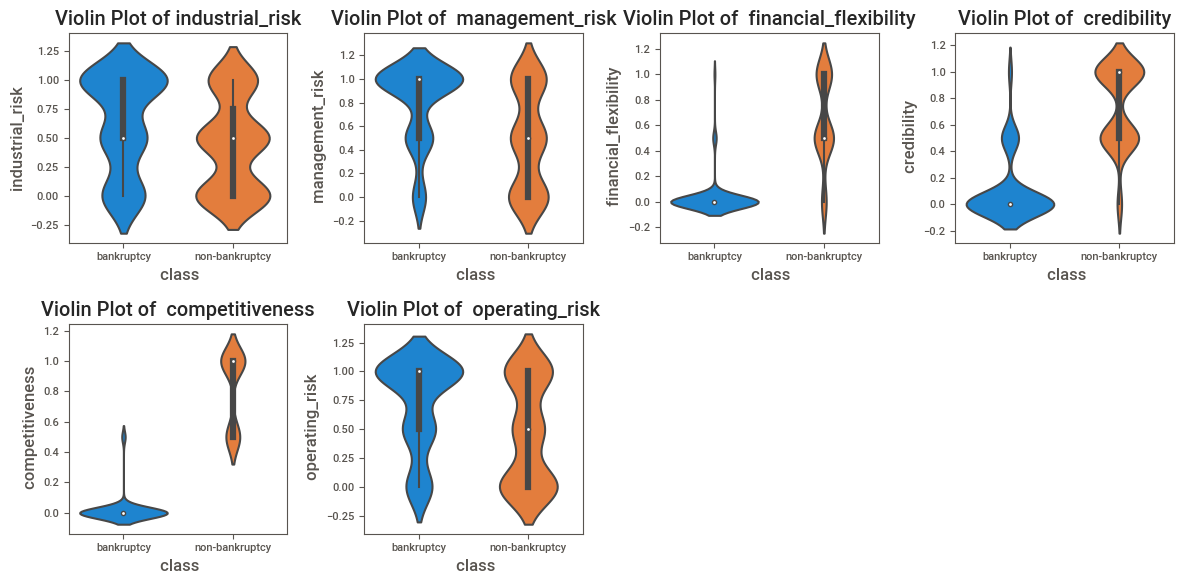

In [54]:
# Violin plot for each feature by class
plt.figure(figsize=(12, 6))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 4, i + 1)
    sns.violinplot(x=' class', y=column, data=df)
    plt.title(f'Violin Plot of {column}')
plt.tight_layout()
plt.show()




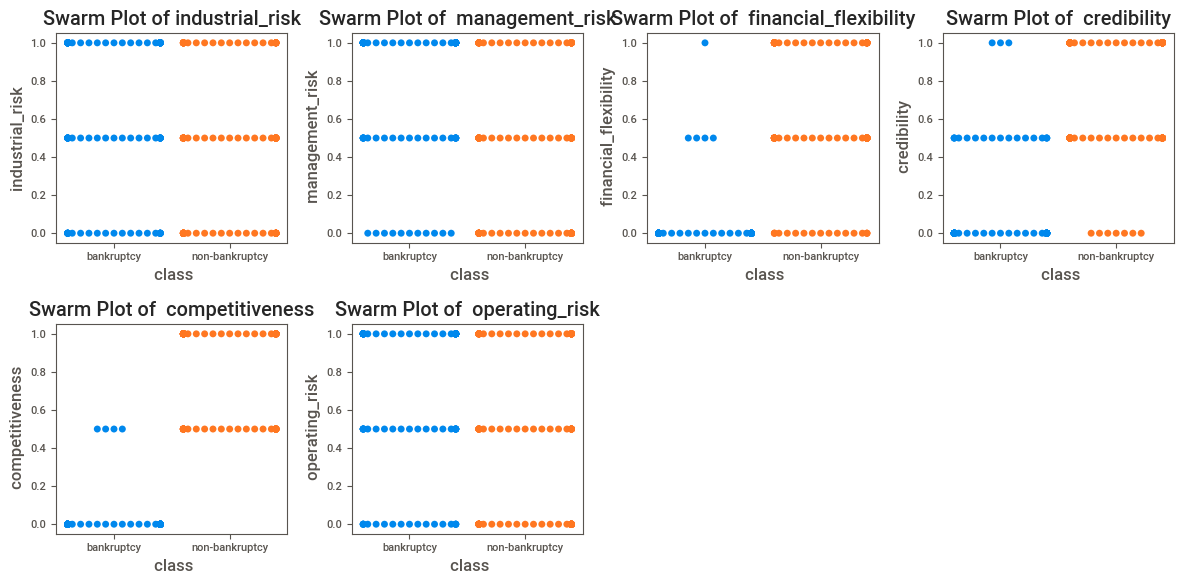

In [69]:
# Swarm plot for each feature by class
plt.figure(figsize=(12, 6))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 4, i + 1)
    sns.swarmplot(x=' class', y=column, data=df)
    plt.title(f'Swarm Plot of {column}')
plt.tight_layout()
plt.show()

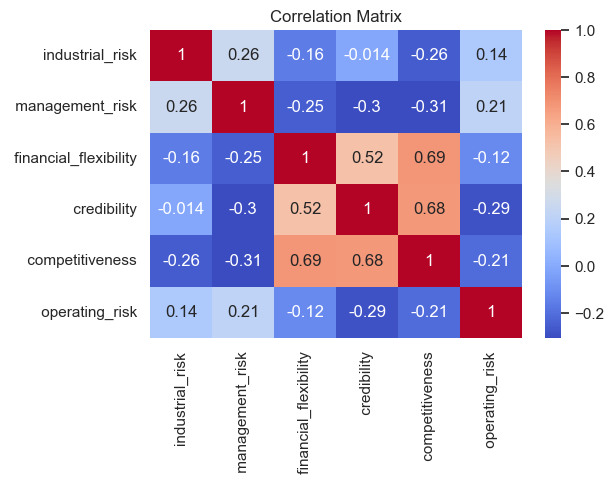

In [17]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


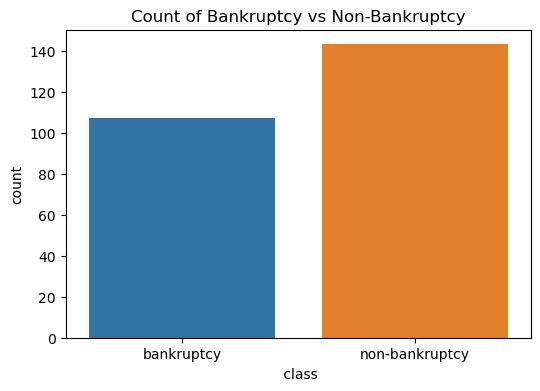

In [8]:
# Countplot for the target variable

plt.figure(figsize=(6, 4))
sns.countplot(x=' class',data=df)
plt.title('Count of Bankruptcy vs Non-Bankruptcy')
plt.show()


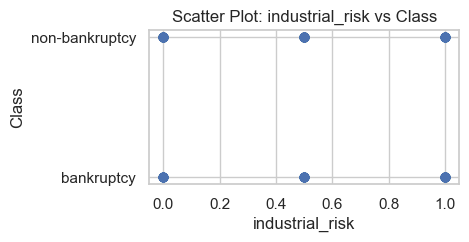

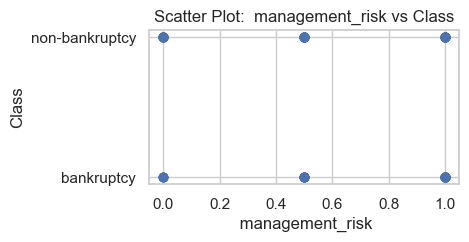

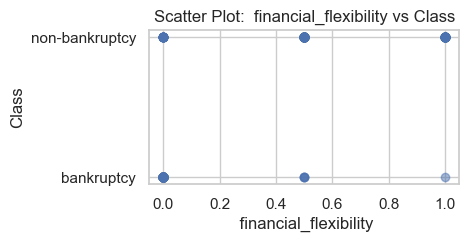

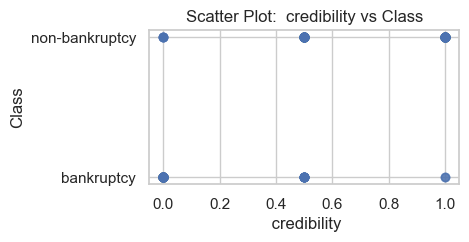

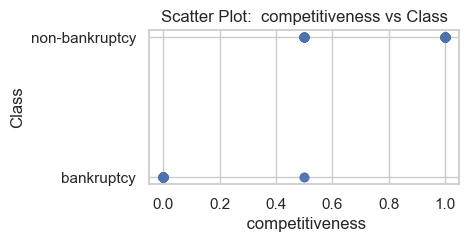

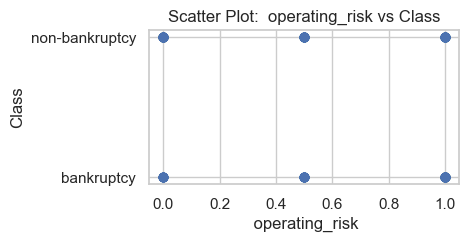

In [20]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Iterate through each feature and create a separate scatter plot for each one against the target variable
for column in df.columns[:-1]:
    plt.figure(figsize=(4, 2))
    plt.scatter(df[column], df[' class'], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Class')
    plt.title(f'Scatter Plot: {column} vs Class')
    plt.show()

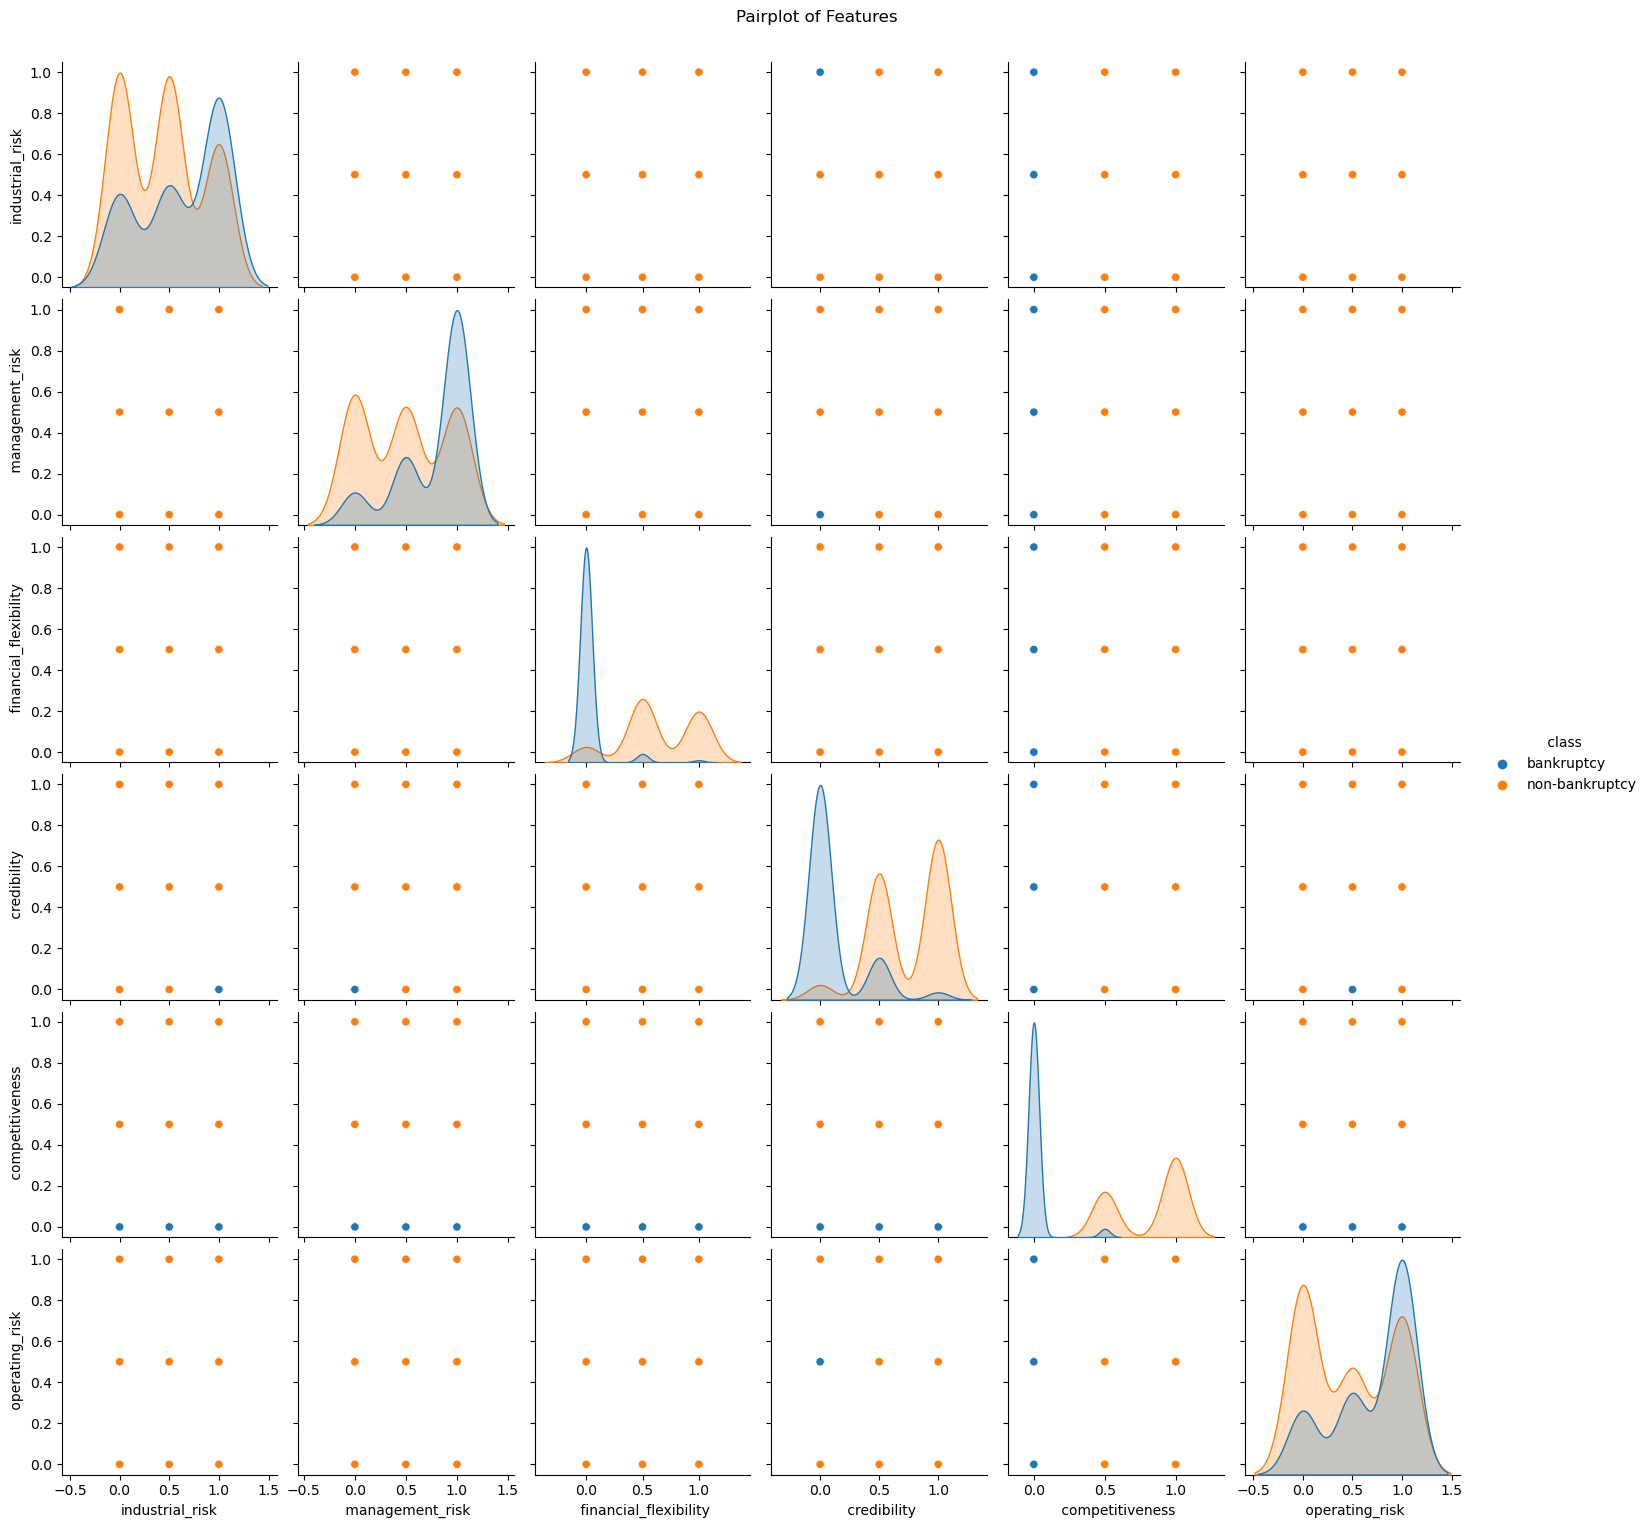

In [13]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue=' class', diag_kind='kde')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

In [22]:
import pandas as pd
from pandas_profiling import ProfileReport

# Generate the EDA report
profile = ProfileReport(df)
profile.to_file("eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [62]:
import sweetviz as sv
# Generate the EDA report
report = sv.analyze(df)
report.show_html("sweetviz_report.html")

                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [24]:
#file:///C:/Users/prabi/Documents/sweetviz_report.html

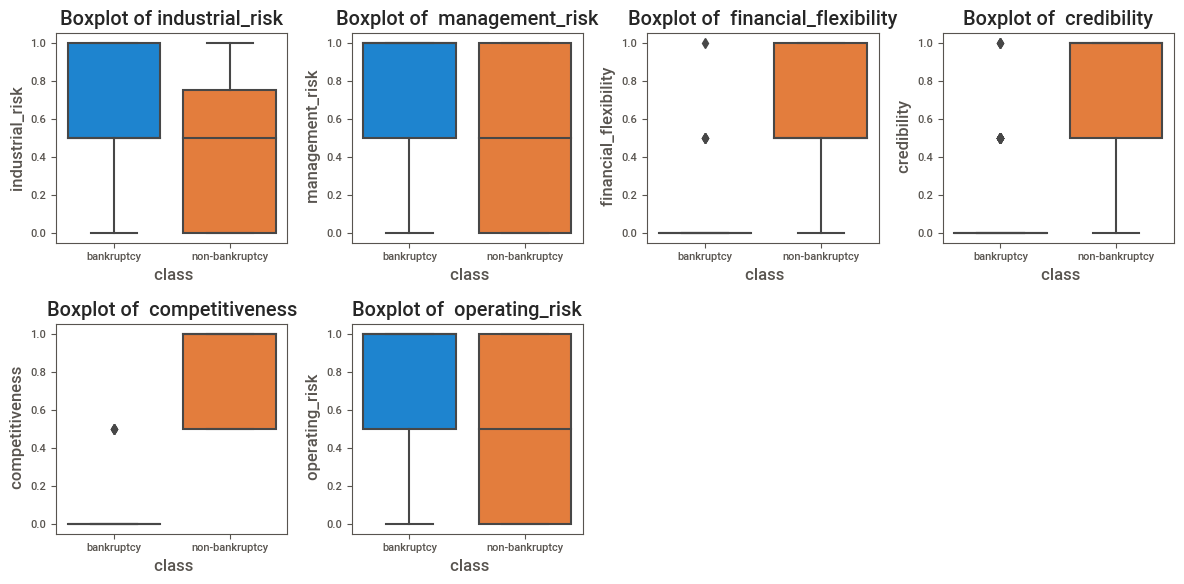

In [63]:
# Boxplot for each feature
plt.figure(figsize=(12, 6))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=' class', y=column, data=df)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [84]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable ('class')
df[' class'] = label_encoder.fit_transform(df[' class'])

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error
import numpy as np

# Features (X) and target variable (y)
X = df.drop(' class', axis=1)
y = df[' class']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

<IPython.core.display.Javascript object>

In [86]:
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the standardized training data
model.fit(X_train_standardized, y_train)

# Make predictions on the standardized test data
predictions = model.predict(X_test_standardized)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
# Print classification report
print(classification_report(y_test, predictions))

# Calculate RMSE, MAE, MSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Root Mean Squared Error (RMSE): 0.00
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00


ROC-AUC Score: 1.00


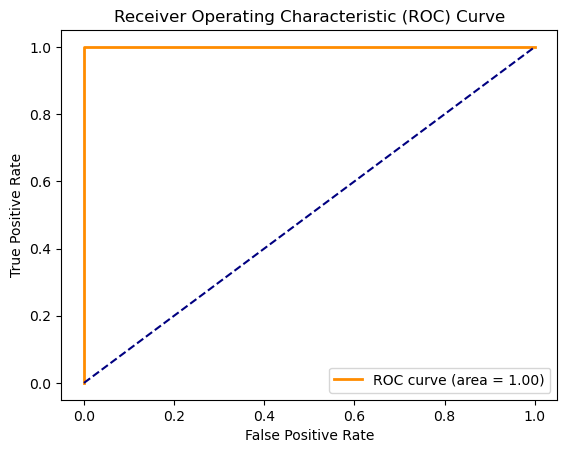

In [87]:
# Calculate ROC-AUC score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


roc_auc = roc_auc_score(y_test, predictions)
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, predictions)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

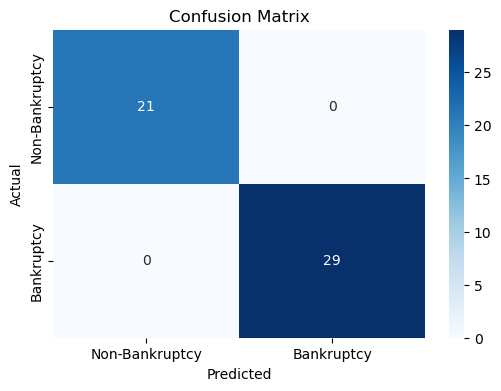

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Non-Bankruptcy', 'Bankruptcy'], 
            yticklabels=['Non-Bankruptcy', 'Bankruptcy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [89]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model on the standardized training data
random_forest_model.fit(X_train_standardized, y_train)

# Make predictions on the standardized test data
rf_predictions = random_forest_model.predict(X_test_standardized)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')
# Print classification report for Random Forest
print(classification_report(y_test, rf_predictions))

# Calculate confusion matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)


Random Forest Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [90]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC-AUC score for Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_predictions)
print(f'Random Forest ROC-AUC Score: {rf_roc_auc:.2f}')

# Calculate RMSE, MAE, and MSE for Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

print(f'Random Forest Root Mean Squared Error (RMSE): {rf_rmse:.2f}')
print(f'Random Forest Mean Absolute Error (MAE): {rf_mae:.2f}')
print(f'Random Forest Mean Squared Error (MSE): {rf_mse:.2f}')

Random Forest ROC-AUC Score: 1.00
Random Forest Root Mean Squared Error (RMSE): 0.00
Random Forest Mean Absolute Error (MAE): 0.00
Random Forest Mean Squared Error (MSE): 0.00


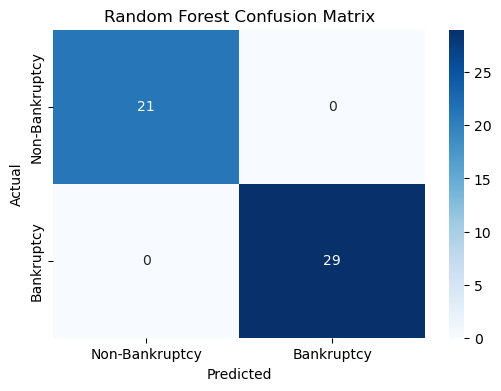

In [91]:
# Visualize the confusion matrix for Random Forest using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(rf_conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Non-Bankruptcy', 'Bankruptcy'], 
            yticklabels=['Non-Bankruptcy', 'Bankruptcy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

Random Forest ROC-AUC Score: 1.00


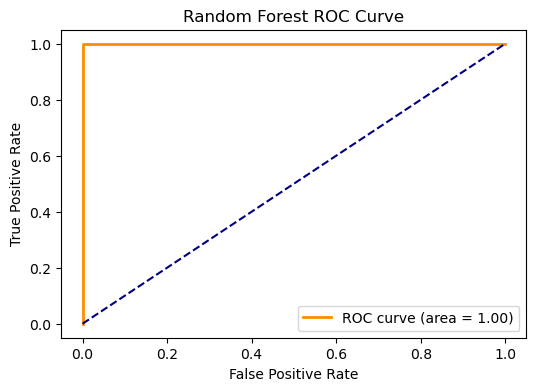

In [92]:
# Calculate ROC-AUC score for Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_predictions)
print(f'Random Forest ROC-AUC Score: {rf_roc_auc:.2f}')

# Plot ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_predictions)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [93]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine classifier
svm_model = SVC(random_state=42)

# Train the model on the standardized training data
svm_model.fit(X_train_standardized, y_train)

# Make predictions on the standardized test data
svm_predictions = svm_model.predict(X_test_standardized)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy:.2f}')

# Print classification report for SVM
print(classification_report(y_test, svm_predictions))

SVM Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [94]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine classifier
svm_model = SVC(random_state=42)

# Train the model on the standardized training data
svm_model.fit(X_train_standardized, y_train)

# Make predictions on the standardized test data
svm_predictions = svm_model.predict(X_test_standardized)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy:.2f}')

# Print classification report for SVM
print(classification_report(y_test, svm_predictions))
# Calculate RMSE, MAE, and MSE for SVM
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_predictions))
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_mse = mean_squared_error(y_test, svm_predictions)

print(f'SVM Root Mean Squared Error (RMSE): {svm_rmse:.2f}')
print(f'SVM Mean Absolute Error (MAE): {svm_mae:.2f}')
print(f'SVM Mean Squared Error (MSE): {svm_mse:.2f}')

SVM Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

SVM Root Mean Squared Error (RMSE): 0.00
SVM Mean Absolute Error (MAE): 0.00
SVM Mean Squared Error (MSE): 0.00


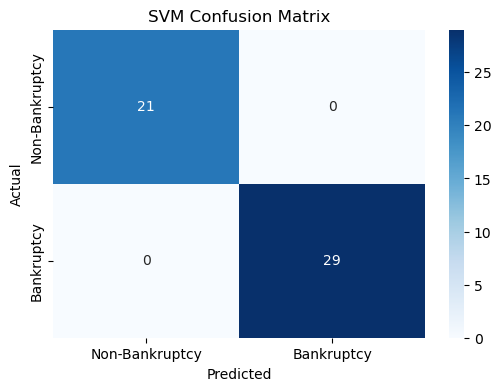

In [95]:
# Calculate confusion matrix for SVM
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

# Visualize the confusion matrix for SVM using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(svm_conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Non-Bankruptcy', 'Bankruptcy'], 
            yticklabels=['Non-Bankruptcy', 'Bankruptcy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

SVM ROC-AUC Score: 1.00


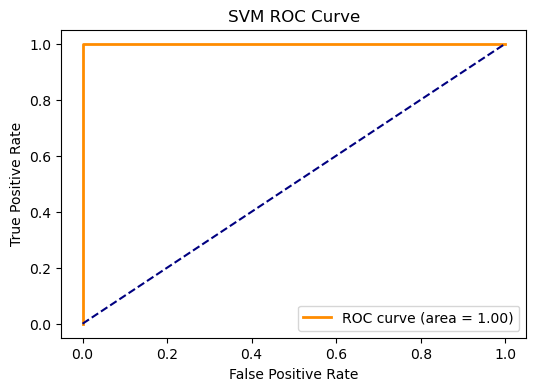

In [96]:
# Calculate ROC-AUC score for SVM
svm_roc_auc = roc_auc_score(y_test, svm_predictions)
print(f'SVM ROC-AUC Score: {svm_roc_auc:.2f}')

# Plot ROC curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_predictions)
plt.figure(figsize=(6, 4))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [97]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Train the model on the standardized training data
gradient_boosting_model.fit(X_train_standardized, y_train)

# Make predictions on the standardized test data
gb_predictions = gradient_boosting_model.predict(X_test_standardized)

# Evaluate the Gradient Boosting model
gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f'Gradient Boosting Accuracy: {gb_accuracy:.2f}')

# Print classification report for Gradient Boosting
print(classification_report(y_test, gb_predictions))
# Calculate RMSE, MAE, and MSE for Gradient Boosting
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)

print(f'Gradient Boosting Root Mean Squared Error (RMSE): {gb_rmse:.2f}')
print(f'Gradient Boosting Mean Absolute Error (MAE): {gb_mae:.2f}')
print(f'Gradient Boosting Mean Squared Error (MSE): {gb_mse:.2f}')

Gradient Boosting Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.98        29

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Gradient Boosting Root Mean Squared Error (RMSE): 0.14
Gradient Boosting Mean Absolute Error (MAE): 0.02
Gradient Boosting Mean Squared Error (MSE): 0.02


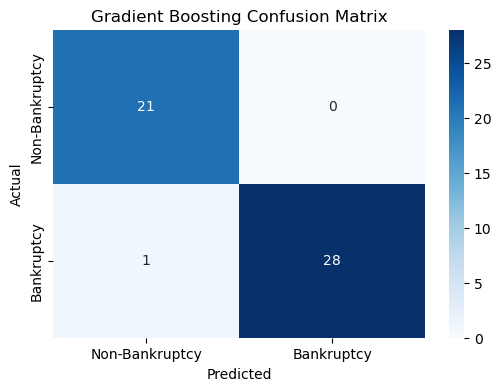

In [98]:
# Calculate confusion matrix for Gradient Boosting
gb_conf_matrix = confusion_matrix(y_test, gb_predictions)

# Visualize the confusion matrix for Gradient Boosting using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(gb_conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Non-Bankruptcy', 'Bankruptcy'], 
            yticklabels=['Non-Bankruptcy', 'Bankruptcy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()


Gradient Boosting ROC-AUC Score: 0.98


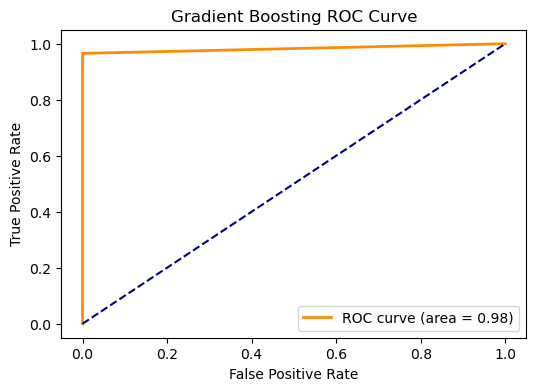

In [99]:
# Calculate ROC-AUC score for Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_predictions)
print(f'Gradient Boosting ROC-AUC Score: {gb_roc_auc:.2f}')

# Plot ROC curve for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_predictions)
plt.figure(figsize=(6, 4))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Initialize the Neural Network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_standardized.shape[1],)),
    Dropout(0.3),  # Dropout layer to prevent overfitting
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])
# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the standardized training data
history = nn_model.fit(X_train_standardized, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the Neural Network model on the standardized test data
nn_loss, nn_accuracy = nn_model.evaluate(X_test_standardized, y_test)
print(f'Neural Network Accuracy: {nn_accuracy:.2f}')

Epoch 1/50
6/6 [==============================] - 1s 55ms/step - loss: 0.6957 - accuracy: 0.5278 - val_loss: 0.6208 - val_accuracy: 0.9000
Epoch 2/50
6/6 [==============================] - 0s 12ms/step - loss: 0.5994 - accuracy: 0.7056 - val_loss: 0.5381 - val_accuracy: 0.9500
Epoch 3/50
6/6 [==============================] - 0s 12ms/step - loss: 0.5005 - accuracy: 0.8778 - val_loss: 0.4633 - val_accuracy: 1.0000
Epoch 4/50
6/6 [==============================] - 0s 12ms/step - loss: 0.4430 - accuracy: 0.8944 - val_loss: 0.3955 - val_accuracy: 1.0000
Epoch 5/50
6/6 [==============================] - 0s 11ms/step - loss: 0.3792 - accuracy: 0.9444 - val_loss: 0.3347 - val_accuracy: 1.0000
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 0.3502 - accuracy: 0.9278 - val_loss: 0.2791 - val_accuracy: 1.0000
Epoch 7/50
6/6 [==============================] - 0s 12ms/step - loss: 0.2638 - accuracy: 0.9889 - val_loss: 0.2316 - val_accuracy: 1.0000
Epoch 8/50
6/6 [===========

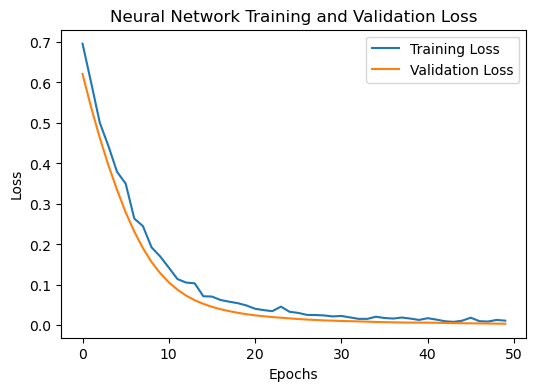

In [33]:
# Plot the training and validation loss over epochs
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Neural Network Training and Validation Loss')
plt.show()

2/2 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



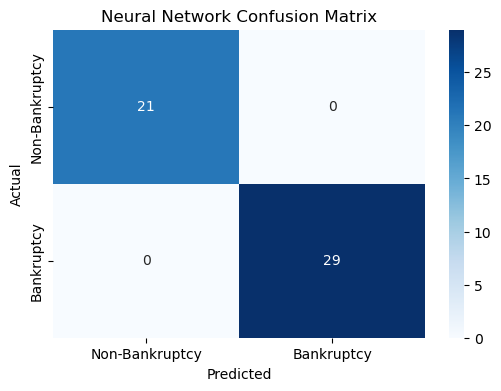

In [34]:
# Make predictions using the Neural Network model
nn_predictions = (nn_model.predict(X_test_standardized) > 0.5).astype(int).reshape(-1)

# Print classification report for Neural Network
print(classification_report(y_test, nn_predictions))
# Calculate confusion matrix for Neural Network
nn_conf_matrix = confusion_matrix(y_test, nn_predictions)

# Visualize the confusion matrix for Neural Network using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(nn_conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Non-Bankruptcy', 'Bankruptcy'], 
            yticklabels=['Non-Bankruptcy', 'Bankruptcy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()

In [100]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Initialize the SVM classifier
svm_model = SVC(random_state=42)
# Initialize Grid Search Cross-Validation with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)

# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train_standardized, y_train)

# Get the best parameters and best estimator from Grid Search
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

# Print the best parameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [101]:
# Initialize the SVM classifier with the best hyperparameters
best_svm_model = SVC(C=0.1, gamma='scale', kernel='linear', random_state=42)

# Train the best SVM model on the standardized training data
best_svm_model.fit(X_train_standardized, y_train)

# Make predictions on the standardized test data
svm_predictions = best_svm_model.predict(X_test_standardized)

# Evaluate the best SVM model on the test data
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy with Best Hyperparameters: {svm_accuracy:.2f}')


SVM Accuracy with Best Hyperparameters: 1.00


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



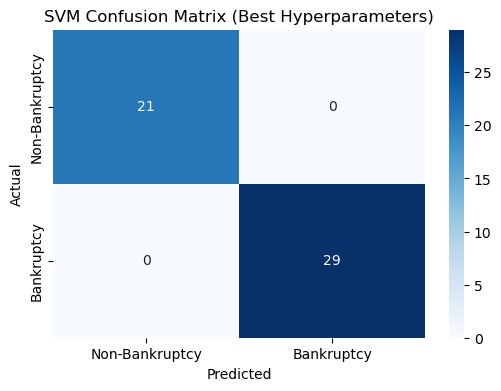

In [102]:
# Print classification report for SVM with best hyperparameters
print(classification_report(y_test, svm_predictions))

# Calculate confusion matrix for SVM with best hyperparameters
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

# Visualize the confusion matrix for SVM with best hyperparameters using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(svm_conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Non-Bankruptcy', 'Bankruptcy'], 
            yticklabels=['Non-Bankruptcy', 'Bankruptcy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix (Best Hyperparameters)')
plt.show()

In [103]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model on the standardized training data
decision_tree_model.fit(X_train_standardized, y_train)

# Make predictions on the standardized test data
decision_tree_predictions = decision_tree_model.predict(X_test_standardized)

# Evaluate the Decision Tree model
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
print(f'Decision Tree Accuracy: {decision_tree_accuracy:.2f}')

# Print classification report for Decision Tree
print(classification_report(y_test, decision_tree_predictions))


Decision Tree Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.98        29

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



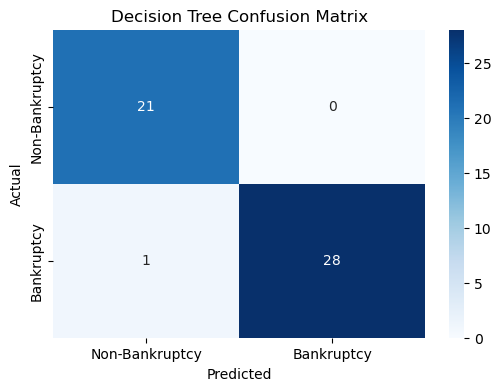

In [104]:
# Calculate confusion matrix for Decision Tree
decision_tree_conf_matrix = confusion_matrix(y_test, decision_tree_predictions)

# Visualize the confusion matrix for Decision Tree using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(decision_tree_conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Non-Bankruptcy', 'Bankruptcy'], 
            yticklabels=['Non-Bankruptcy', 'Bankruptcy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

Decision Tree ROC-AUC Score: 0.98


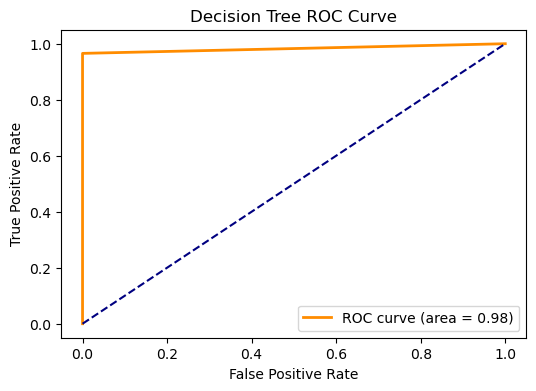

In [105]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC-AUC score for Decision Tree
decision_tree_roc_auc = roc_auc_score(y_test, decision_tree_predictions)
print(f'Decision Tree ROC-AUC Score: {decision_tree_roc_auc:.2f}')

# Plot ROC curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, decision_tree_predictions)
plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % decision_tree_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [106]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
naive_bayes_model = GaussianNB()

# Train the model on the standardized training data
naive_bayes_model.fit(X_train_standardized, y_train)

# Make predictions on the standardized test data
naive_bayes_predictions = naive_bayes_model.predict(X_test_standardized)

# Evaluate the Naive Bayes model
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
print(f'Naive Bayes Accuracy: {naive_bayes_accuracy:.2f}')
# Print classification report for Naive Bayes
print(classification_report(y_test, naive_bayes_predictions))

# Calculate confusion matrix for Naive Bayes
naive_bayes_conf_matrix = confusion_matrix(y_test, naive_bayes_predictions)


Naive Bayes Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



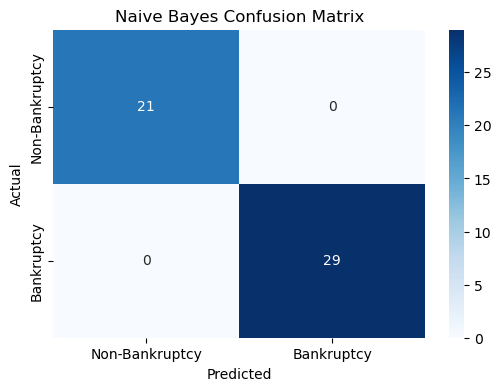

In [107]:
# Visualize the confusion matrix for Naive Bayes using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(naive_bayes_conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Non-Bankruptcy', 'Bankruptcy'], 
            yticklabels=['Non-Bankruptcy', 'Bankruptcy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

Naive Bayes ROC-AUC Score: 1.00


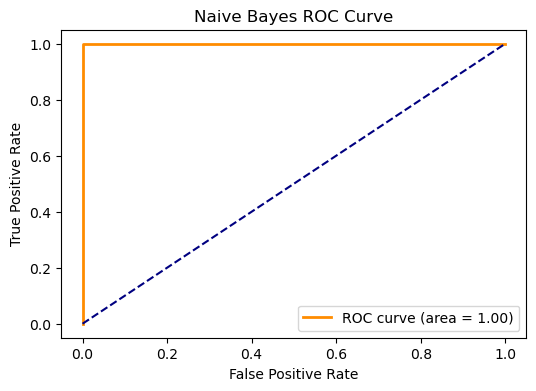

In [108]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC-AUC score for Naive Bayes
naive_bayes_roc_auc = roc_auc_score(y_test, naive_bayes_predictions)
print(f'Naive Bayes ROC-AUC Score: {naive_bayes_roc_auc:.2f}')

# Plot ROC curve for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, naive_bayes_predictions)
plt.figure(figsize=(6,4))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % naive_bayes_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [109]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier (let's set k=5 for this example)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the standardized training data
knn_model.fit(X_train_standardized, y_train)

# Make predictions on the standardized test data
knn_predictions = knn_model.predict(X_test_standardized)

# Evaluate the KNN model
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'K-Nearest Neighbors (KNN) Accuracy: {knn_accuracy:.2f}')
# Print classification report for KNN
print(classification_report(y_test, knn_predictions))


K-Nearest Neighbors (KNN) Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.98        29

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



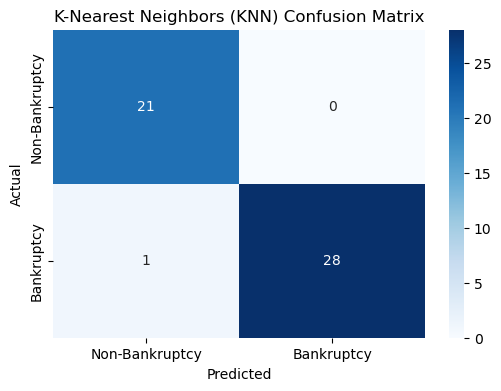

In [110]:
# Calculate confusion matrix for KNN
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)

# Visualize the confusion matrix for KNN using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(knn_conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Non-Bankruptcy', 'Bankruptcy'], 
            yticklabels=['Non-Bankruptcy', 'Bankruptcy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('K-Nearest Neighbors (KNN) Confusion Matrix')
plt.show()

K-Nearest Neighbors (KNN) ROC-AUC Score: 0.98


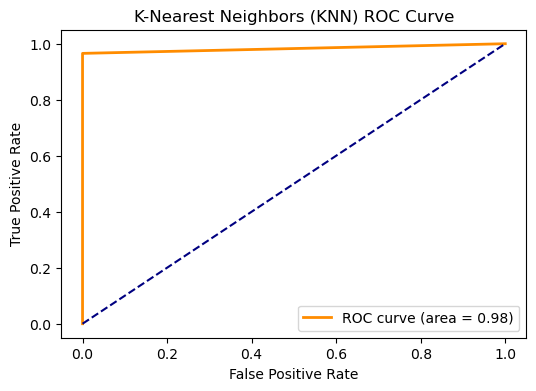

In [111]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC-AUC score for KNN
knn_roc_auc = roc_auc_score(y_test, knn_predictions)
print(f'K-Nearest Neighbors (KNN) ROC-AUC Score: {knn_roc_auc:.2f}')

# Plot ROC curve for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_predictions)
plt.figure(figsize=(6,4))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Nearest Neighbors (KNN) ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define models
models = [model, random_forest_model, gradient_boosting_model, best_svm_model, 
          naive_bayes_model, decision_tree_model, knn_model]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 
               'Naive Bayes', 'Decision Tree', 'KNN']

# Initialize lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
errors_list = []
for  model, name in zip(models, model_names):
    predictions = model.predict(X_test_standardized)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    # Calculate errors (misclassifications)
    errors = sum(predictions != y_test)
    errors_list.append(errors)
    # Create a summary table
summary_table = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores,
    'Errors': errors_list
})

# Display the summary table
print(summary_table)

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define models
models = [model, random_forest_model, gradient_boosting_model, best_svm_model, 
          naive_bayes_model, decision_tree_model, knn_model]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 
               'Naive Bayes', 'Decision Tree', 'KNN']

# Initialize lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
errors_list = []
for  model, name in zip(models, model_names):
    predictions = model.predict(X_test_standardized)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    # Calculate errors (misclassifications)
    errors = sum(predictions != y_test)
    errors_list.append(errors)
    # Create a summary table
summary_table = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores,
    'Errors': errors_list
})

# Display the summary table
print(summary_table)

                 Model  Accuracy  Precision    Recall  F1-Score  Errors
0  Logistic Regression      1.00        1.0  1.000000  1.000000       0
1        Random Forest      1.00        1.0  1.000000  1.000000       0
2    Gradient Boosting      0.98        1.0  0.965517  0.982456       1
3                  SVM      1.00        1.0  1.000000  1.000000       0
4          Naive Bayes      1.00        1.0  1.000000  1.000000       0
5        Decision Tree      0.98        1.0  0.965517  0.982456       1
6                  KNN      0.98        1.0  0.965517  0.982456       1


In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define models
models = [model, random_forest_model, gradient_boosting_model, best_svm_model, 
          naive_bayes_model, decision_tree_model, knn_model]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 
               'Naive Bayes', 'Decision Tree', 'KNN']

# Initialize lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
errors_list = []
for  model, name in zip(models, model_names):
    predictions = model.predict(X_test_standardized)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    # Calculate errors (misclassifications)
    errors = sum(predictions != y_test)
    errors_list.append(errors)
    # Create a summary table
summary_table = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores,
    
})

# Display the summary table
print(summary_table)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression      0.98        1.0  0.965517  0.982456
1        Random Forest      1.00        1.0  1.000000  1.000000
2    Gradient Boosting      0.98        1.0  0.965517  0.982456
3                  SVM      1.00        1.0  1.000000  1.000000
4          Naive Bayes      1.00        1.0  1.000000  1.000000
5        Decision Tree      0.98        1.0  0.965517  0.982456
6                  KNN      0.98        1.0  0.965517  0.982456
